In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('min_rows', 40)

In [40]:
sea = pd.read_csv('data/ALL_YEARS_building-energy-benchmarking-clean.csv')

In [47]:
sea.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),Electricity(kWh),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,98101.0,7.0,DOWNTOWN,47.612190,-122.337997,1927,12.0,1.0,88434,0,NaN,65.0,78.9,80.3,173.5,175.1,6981428,7097539,2023032.0,3686160,1080307.0,12724.0,1272388,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,98101.0,7.0,DOWNTOWN,47.613106,-122.333358,1996,11.0,1.0,103566,15064,NaN,51.0,94.4,99.0,191.3,195.2,8354235,8765788,0.0,3905411,1144563.0,44490.0,4448985,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,98101.0,7.0,DOWNTOWN,47.613349,-122.337699,1969,41.0,1.0,961990,0,NaN,18.0,96.6,99.7,242.7,246.5,73130656,75506272,19660404.0,49762435,14583930.0,37099.0,3709900,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,7.0,DOWNTOWN,47.614216,-122.336609,1926,10.0,1.0,61320,0,NaN,1.0,460.4,462.5,636.3,643.2,28229320,28363444,23458518.0,2769023,811521.0,20019.0,2001894,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,98121.0,7.0,DOWNTOWN,47.613754,-122.340924,1980,18.0,1.0,119890,12460,NaN,67.0,120.1,122.1,228.8,227.1,14829099,15078243,0.0,6066245,1777841.0,87631.0,8763105,507.70,4.02


In [18]:
sea_plot = sea[['DataYear', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',  'ENERGYSTARScore',
                'SiteEUIWN(kBtu/sf)', 'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 
                'GHGEmissionsIntensity(kgCO2e/ft2)'
                ]]

In [19]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16996 entries, 0 to 17008
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      16996 non-null  int64  
 1   DataYear                           16996 non-null  int64  
 2   BuildingType                       16996 non-null  object 
 3   PrimaryPropertyType                13505 non-null  object 
 4   PropertyName                       16996 non-null  object 
 5   Address                            16996 non-null  object 
 6   ZipCode                            16880 non-null  float64
 7   CouncilDistrictCode                16953 non-null  float64
 8   Neighborhood                       16975 non-null  object 
 9   Latitude                           16975 non-null  float64
 10  Longitude                          16975 non-null  float64
 11  YearBuilt                          16996 non-null  int

In [20]:
sea.dropna(subset=['Electricity(kBtu)'],
            inplace=True)

In [21]:
index_drop = sea[(sea['GHGEmissions(MetricTonsCO2e)'].isna()) | (sea['Electricity(kBtu)']==0)].index
sea.drop(index=index_drop, inplace=True)

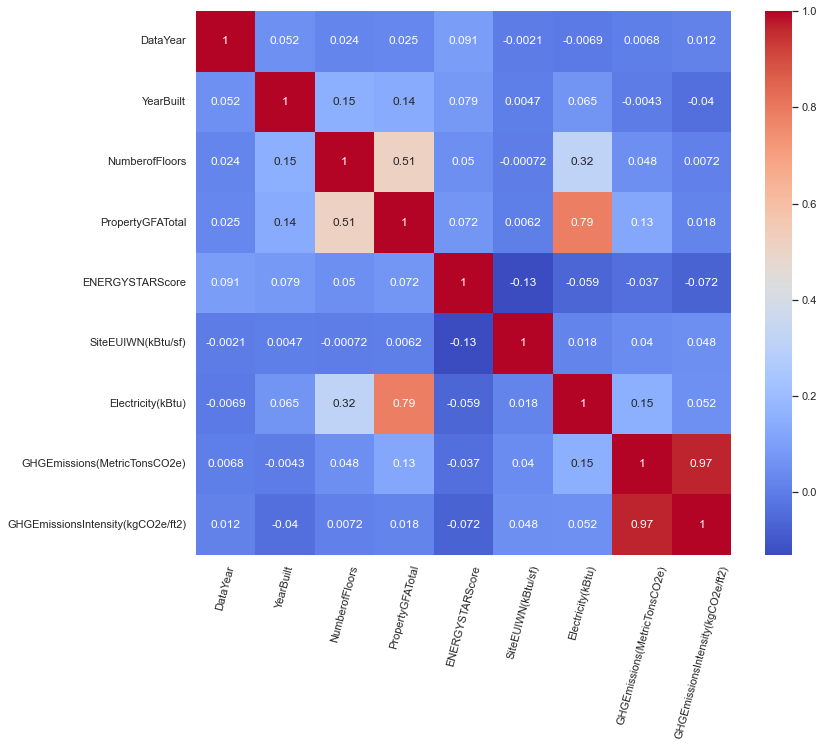

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(sea_plot.corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=75)
plt.show()

In [23]:
building_id = sea['OSEBuildingID'][sea['NumberofFloors'].isna()]

2006    24086
3159    40028
3160    40031
3161    40034
3181    43948
3197    49705
3299    49958
3301    49966
Name: OSEBuildingID, dtype: int64

In [64]:
floors_none = sea[['OSEBuildingID', 'NumberofFloors', 'DataYear', ]][sea['OSEBuildingID'].isin(list(building_id))]
floors_none = floors_none.groupby('OSEBuildingID').max('NumberofFollrs')
floors_none

,NumberofFloors,DataYear
OSEBuildingID,,
24086,0.0,2020
40028,1.0,2020
40031,0.0,2020
40034,0.0,2020
43948,2.0,2020
49705,0.0,2020
49958,1.0,2020
49966,1.0,2020


In [74]:
ps.sqldf("""
UPDATE sea SET sea.NumberofFloors = floors_none.NumberofFloors
FROM 
sea INNER JOIN floors_none ON sea.OSEBuildingID = floors_none.OSEBuildingID
""")

PandaSQLException: (sqlite3.OperationalError) near ".": syntax error
[SQL: 
UPDATE sea SET sea.NumberofFloors = 1
FROM 
sea INNER JOIN floors_none ON sea.OSEBuildingID = floors_none.OSEBuildingID
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [60]:
sea[sea['OSEBuildingID'] == 49705]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),Electricity(kWh),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
3197,49705,2015,Nonresidential COS,Other,MAGNUSON PARK CAMPUS,7400 SAND POINT WAY NE,98115.0,4.0,NORTHEAST,47.683179,-122.258795,1929,NaN,7.0,502030,0,NaN,NaN,30.600000,36.600000,68.0,76.300000,17290816,20657716,0.0,9661544,2831519.0,76297.00000,7629673,472.56,0.860
6473,49705,2016,Nonresidential COS,Other,Magnuson,7400 Sand Point Way NE,98115.0,4.0,NORTHEAST,47.682120,-122.263300,1929,0.0,8.0,502030,0,NaN,NaN,32.700001,36.599998,69.0,74.300003,18470340,20672948,0.0,9359884,2743225.0,91104.54688,9110455,549.11,1.090
9838,49705,2017,Campus,Other,Magnuson,7400 Sand Point Way NE,98115.0,4.0,NORTHEAST,47.682120,-122.263300,1929,0.0,9.0,489872,0,0.0,NaN,34.900000,33.800000,71.8,70.200000,19717104,19097010,0.0,9471461,2775926.0,102456.00000,10245640,583.33,1.191
13143,49705,2019,Campus,Other - Recreation,MAGNUSON PARK CAMPUS,7400 SAND POINT WAY NE,98115.0,1.0,NORTHEAST,47.682120,-122.263300,1929,0.0,NaN,564258,0,NaN,NaN,37.200000,37.800000,71.9,72.800000,21348828,20976908,0.0,10586334,3102677.0,103906.00000,10390574,617.10,1.100
16535,49705,2020,Campus,NaN,MAGNUSON PARK CAMPUS,7400 SAND POINT WAY NE,98115.0,1.0,NORTHEAST,47.682120,-122.263300,1929,0.0,7.0,564258,0,NaN,NaN,30.400000,32.000000,57.9,60.000000,18035210,17178312,0.0,8359956,2450163.0,88184.00000,8818355,512.80,0.900


In [75]:
sea['NumberofFloors'].value_counts()

4.0     3572
3.0     3426
1.0     2193
2.0     2106
6.0     1607
5.0     1523
7.0      831
8.0      325
11.0     165
10.0     161
12.0     112
13.0     104
9.0      102
0.0       62
14.0      60
17.0      48
15.0      41
24.0      40
16.0      35
23.0      35
18.0      34
26.0      30
42.0      29
33.0      29
19.0      29
21.0      27
20.0      24
25.0      24
27.0      22
22.0      20
41.0      19
37.0      18
29.0      15
39.0      13
40.0      11
36.0      10
34.0      10
28.0      10
31.0       9
38.0       6
63.0       5
55.0       5
46.0       5
30.0       5
56.0       5
49.0       5
76.0       5
47.0       5
32.0       5
99.0       2
44.0       2
45.0       2
Name: NumberofFloors, dtype: int64

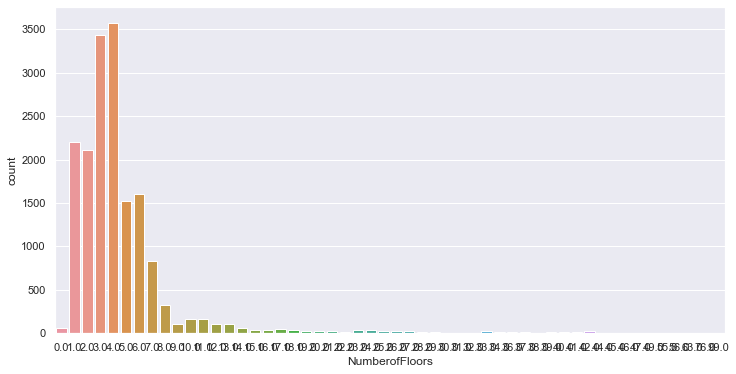

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=sea['NumberofFloors'])
plt.show()